In [3]:
%plot --format svg

In [4]:
setdefaults

# LU Decomposition
### efficient storage of matrices for solutions

Consider equation set:

$y=Ax$

Assume that we can perform Gauss elimination and achieve this formula:

$Ux=d$ 

$U$: upper triangular matrix derived from Gauss elimination 

$d$: is the set of dependent variables after Gauss elimination. 

Assume lower triangular matrix, $L$, exists 

- ones on the diagonal 
- same dimensions as $U$ 
- following is true:

$L(Ux-d)=Ax-y=0$

Now, $Ax=LUx$, so $A=LU$, and $y=Ld$.

$2x_{1}+x_{2}=1$

$x_{1}+3x_{2}=1$


$\left[ \begin{array}{cc}
2 & 1 \\
1 & 3 \end{array} \right]
\left[\begin{array}{c} 
x_{1} \\ 
x_{2} \end{array}\right]=
\left[\begin{array}{c} 
1 \\
1\end{array}\right]$

f21=0.5

A(2,1)=1-1 = 0 

A(2,2)=3-0.5=2.5

y(2)=1-0.5=0.5

$L(Ux-d)=
\left[ \begin{array}{cc}
1 & 0 \\
0.5 & 1 \end{array} \right]
\left(\left[ \begin{array}{cc}
2 & 1 \\
0 & 2.5 \end{array} \right]
\left[\begin{array}{c} 
x_{1} \\ 
x_{2} \end{array}\right]-
\left[\begin{array}{c} 
1 \\
0.5\end{array}\right]\right)=0$

In [12]:
A=[2,1;1,3];
L=[1,0;0.5,1];
U=[2,1;0,2.5];
L*U

d=[1;0.5]
y=L*d

ans =

   2   1
   1   3

d =

   1.00000
   0.50000

y =

   1
   1



In [13]:
% what is the determinant of L, U and A?

det(A)
det(L)
det(U)
det(L)*det(U)
det(L*U)

ans =  5.0000
ans =  1
ans =  5
ans =  5
ans =  5.0000


## Pivoting for LU factorization

LU factorization uses the same method as Gauss elimination so it is also necessary to perform partial pivoting when creating the lower and upper triangular matrices. 

Matlab and Octave use pivoting in the command 

`[L,U,P]=lu(A)`



In [14]:
help lu

'lu' is a built-in function from the file libinterp/corefcn/lu.cc

 -- Built-in Function: [L, U] = lu (A)
 -- Built-in Function: [L, U, P] = lu (A)
 -- Built-in Function: [L, U, P, Q] = lu (S)
 -- Built-in Function: [L, U, P, Q, R] = lu (S)
 -- Built-in Function: [...] = lu (S, THRES)
 -- Built-in Function: Y = lu (...)
 -- Built-in Function: [...] = lu (..., "vector")
     Compute the LU decomposition of A.

     If A is full subroutines from LAPACK are used and if A is sparse
     then UMFPACK is used.

     The result is returned in a permuted form, according to the
     optional return value P.  For example, given the matrix 'a = [1, 2;
     3, 4]',

          [l, u, p] = lu (A)

     returns

          l =

            1.00000  0.00000
            0.33333  1.00000

          u =

            3.00000  4.00000
            0.00000  0.66667

          p =

            0  1
            1  0

     The matrix is not required to be square.

     When called with two or three output argume

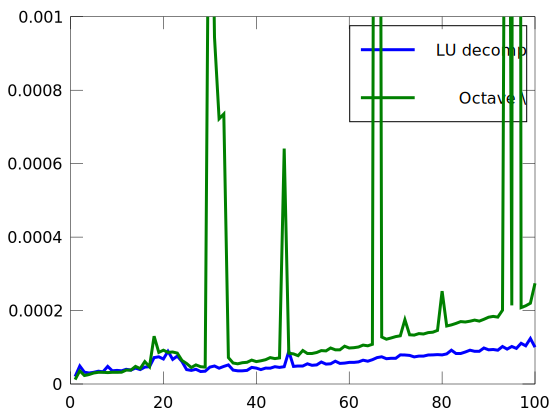

In [16]:
% time LU solution vs backslash
t_lu=zeros(100,1);
t_bs=zeros(100,1);
for N=1:100
    A=rand(N,N);
    y=rand(N,1);
    [L,U,P]=lu(A);

    tic; d=L\y; x=U\d; t_lu(N)=toc;

    tic; x=A\y; t_bs(N)=toc;
end
plot([1:100],t_lu,[1:100],t_bs) 
legend('LU decomp','Octave \\')
axis([0,100,0,0.001])

## Spring-mass system

4 masses are connected in series to 4 springs with K=10 N/m. What are the final positions of the masses? 

![Springs-masses](../lecture_09/mass_springs.svg)

The masses haves the following amounts, 1, 2, 3, and 4 kg for masses 1-4. Using a FBD for each mass:

$m_{1}g+k(x_{2}-x_{1})-kx_{1}=0$

$m_{2}g+k(x_{3}-x_{2})-k(x_{2}-x_{1})=0$

$m_{3}g+k(x_{4}-x_{3})-k(x_{3}-x_{2})=0$

$m_{4}g-k(x_{4}-x_{3})=0$

in matrix form:

$\left[ \begin{array}{cccc}
2k & -k & 0 & 0 \\
-k & 2k & -k & 0 \\
0 & -k & 2k & -k \\
0 & 0 & -k & k \end{array} \right]
\left[ \begin{array}{c}
x_{1} \\
x_{2} \\
x_{3} \\
x_{4} \end{array} \right]=
\left[ \begin{array}{c}
m_{1}g \\
m_{2}g \\
m_{3}g \\
m_{4}g \end{array} \right]$

In [10]:
k=10; % N/m
m1=1; % kg
m2=2;
m3=3;
m4=4;
g=9.81; % m/s^2
K=[2*k -k 0 0; -k 2*k -k 0; 0 -k 2*k -k; 0 0 -k k]
y=[m1*g;m2*g;m3*g;m4*g]

K =

   20  -10    0    0
  -10   20  -10    0
    0  -10   20  -10
    0    0  -10   10

y =

    9.8100
   19.6200
   29.4300
   39.2400



This matrix, K, is symmetric. 

`K(i,j)==K(j,i)`

Now we can use,

## Cholesky Factorization

We can decompose the matrix, K into two matrices, $U$ and $U^{T}$, where

$K=U^{T}U$

each of the components of U can be calculated with the following equations:

$u_{ii}=\sqrt{a_{ii}-\sum_{k=1}^{i-1}u_{ki}^{2}}$

$u_{ij}=\frac{a_{ij}-\sum_{k=1}^{i-1}u_{ki}u_{kj}}{u_{ii}}$

so for K

In [12]:
u11=sqrt(K(1,1))
u12=(K(1,2))/u11
u13=(K(1,3))/u11
u14=(K(1,4))/u11
u22=sqrt(K(2,2)-u12^2)
u23=(K(2,3)-u12*u13)/u22
u24=(K(2,4)-u12*u14)/u22
u33=sqrt(K(3,3)-u13^2-u23^2)
u34=(K(3,4)-u13*u14-u23*u24)/u33
u44=sqrt(K(4,4)-u14^2-u24^2-u34^2)
U=[u11,u12,u13,u14;0,u22,u23,u24;0,0,u33,u34;0,0,0,u44]

u11 =  4.4721
u12 = -2.2361
u13 = 0
u14 = 0
u22 =  3.8730
u23 = -2.5820
u24 = 0
u33 =  3.6515
u34 = -2.7386
u44 =  1.5811
U =

   4.47214  -2.23607   0.00000   0.00000
   0.00000   3.87298  -2.58199   0.00000
   0.00000   0.00000   3.65148  -2.73861
   0.00000   0.00000   0.00000   1.58114



In [17]:
(U'*U)'==U'*U

ans =

   1   1   1   1
   1   1   1   1
   1   1   1   1
   1   1   1   1



In [18]:
% time solution for Cholesky vs backslash
t_chol=zeros(1000,1);
t_bs=zeros(1000,1);
for i=1:1000
    tic; d=U'*y; x=U\d; t_chol(i)=toc;
    tic; x=K\y; t_bs(i)=toc;
end
fprintf('average time spent for Cholesky factored solution = %e+/-%e',mean(t_chol),std(t_chol))

fprintf('average time spent for backslash solution         = %e+/-%e',mean(t_bs),std(t_bs))

average time spent for Cholesky factored solution = 1.465964e-05+/-9.806001e-06
average time spent for backslash solution         = 1.555967e-05+/-1.048561e-05
